<font color=black size=6 face="黑体"> Rickydos/PHBS_TQFML/HW/bank_marketing </font>
   


In [505]:
from sklearn import datasets
import numpy as np
import pandas as pd
bank = pd.read_csv('D:/software/2017.M3.TQF-ML/files/DataSet1/bank.csv',sep=';')
bank.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [506]:
bank.replace([ 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student',
              'technician','unemployed','unknown'],[0,1,2,3,4,5,6,7,8,9,10,np.nan], inplace=True)
bank.replace([ 'divorced','married','single','unknown'],[0,1,2,np.nan], inplace=True)
bank.replace(["unknown","secondary","primary","tertiary"],[np.nan,0,1,2],inplace=True)
bank.replace(["yes","no"],[1,0],inplace=True)
bank.replace(["unknown","telephone","cellular"],[0,1,2],inplace=True)
bank.replace(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov", "dec"],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
bank.replace(["other","failure","success"],[0,1,2],inplace=True)
bank.tail(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4514,38,1.0,1,0.0,0,1205,1,0,2.0,20,4,45,4,153,1,1.0,0
4515,32,7.0,2,0.0,0,473,1,0,2.0,7,7,624,5,-1,0,NaN,0
4516,33,7.0,1,0.0,0,-333,1,0,2.0,30,7,329,5,-1,0,NaN,0
4517,57,6.0,1,2.0,1,-3313,1,1,NaN,9,5,153,1,-1,0,NaN,0
4518,57,9.0,1,0.0,0,295,0,0,2.0,19,8,151,11,-1,0,NaN,0
4519,28,1.0,1,0.0,0,1137,0,0,2.0,6,2,129,4,211,3,0.0,0
4520,44,2.0,2,2.0,0,1136,1,1,2.0,3,4,345,2,249,7,0.0,0


In [507]:
bank_rawdata = bank.iloc[:,[3,14,-1]]
bank_data = bank_rawdata.dropna()
bank_x = bank_data.iloc[:,[0,1]]
bank_norm = (bank_x - bank_x.mean()) / (bank_x.max() - bank_x.min())
from sklearn.model_selection import train_test_split
X=bank_norm.values
y=bank_data.y.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [508]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [3832  502]
Labels counts in y_train: [2682  351]
Labels counts in y_test: [1150  151]


In [509]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [510]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

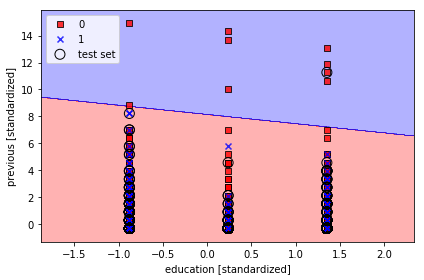

In [511]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(np.bincount(y_train)[0], np.bincount(y)[0]))
plt.xlabel('education [standardized]')
plt.ylabel('previous [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

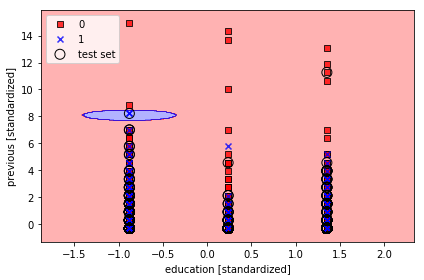

In [512]:
svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(np.bincount(y_train)[0], np.bincount(y)[0]))
plt.xlabel('education [standardized]')
plt.ylabel('previous [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

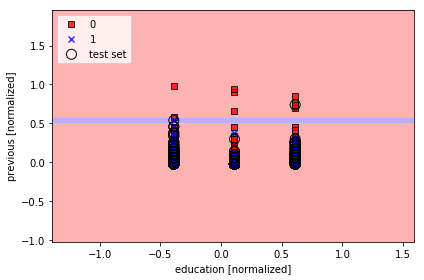

In [513]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(np.bincount(y_train)[0], np.bincount(y)[0]))

plt.xlabel('education [normalized]')
plt.ylabel('previous [normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [514]:
from sklearn.metrics import accuracy_score
y_pred_lr = lr.predict(X_test_std)
y_pred_svm = svm.predict(X_test_std)
y_pred_tree = tree.predict(X_test_std)
print('Accuracy_lr: %.2f' % accuracy_score(y_test, y_pred_lr))
print('Accuracy_svm: %.2f' % accuracy_score(y_test, y_pred_svm))
print('Accuracy_tree: %.2f' % accuracy_score(y_test, y_pred_tree))

Accuracy_lr: 0.88
Accuracy_svm: 0.88
Accuracy_tree: 0.88


After trying dozens of times, I select education and previous to get the best result. :)